In [20]:
# Importing the Pandas library for data manipulation
import pandas as pd

# Importing NumPy for numerical operations
import numpy as np

# Importing LabelEncoder from scikit-learn to encode categorical features
from sklearn.preprocessing import LabelEncoder

# Importing MinMaxScaler and StandardScaler for feature scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Importing SelectKBest and f_classif for feature selection
from sklearn.feature_selection import SelectKBest, f_classif

# Importing Matplotlib for data visualization
import matplotlib.pyplot as plt

# Importing Seaborn for advanced data visualization
import seaborn as sn


In [21]:
df = pd.read_csv('/content/breast-cancer_Dataset.csv')
print("Dataset Preview:")
print(df.head())


Dataset Preview:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  
0          0.11840           0.27760          0.3001              0.14710  
1          0.08474           0.07864          0.0869              0.07017  
2          0.10960           0.15990          0.1974              0.12790  
3          0.14250           0.28390          0.2414              0.10520  
4          0.10030           0.13280          0.1980              0.10430  


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [23]:
#checking if the data set has any missing values
print(df.isnull().sum())

id                     0
diagnosis              0
radius_mean            0
texture_mean           0
perimeter_mean         0
area_mean              0
smoothness_mean        0
compactness_mean       0
concavity_mean         0
concave points_mean    0
dtype: int64


In [24]:
# Importing LabelEncoder from scikit-learn for encoding categorical labels
from sklearn.preprocessing import LabelEncoder

# Creating an instance of LabelEncoder
le = LabelEncoder()

# Encoding the 'diagnosis' column:
# Converts categorical values (like text labels) into numeric values (0, 1, etc.)
df['diagnosis'] = le.fit_transform(df['diagnosis'])

# Displaying the transformed 'diagnosis' column and the counts of unique values
print("Transformed 'diagnosis' column:")
print(df['diagnosis'].value_counts())

Transformed 'diagnosis' column:
diagnosis
0    357
1    212
Name: count, dtype: int64


In [25]:
# Print message indicating the start of log transformation
print("\nApplying Log Transformation to Skewed Features:")

# Select numeric columns and calculate the skewness for each column
skewed_features = df.select_dtypes(include=[np.number]).apply(lambda x: x.skew()).sort_values(ascending=False)

# Filter features with skewness greater than 1 (highly skewed)
skewed_features = skewed_features[skewed_features > 1].index

# Apply log transformation to reduce skewness for each skewed feature
for feature in skewed_features:
    # Apply log(1 + x) transformation to handle potential zero values
    df[feature] = np.log1p(df[feature])

    # Print the name of the transformed feature
    print(f"Transformed feature: {feature}")



Applying Log Transformation to Skewed Features:
Transformed feature: id
Transformed feature: area_mean
Transformed feature: concavity_mean
Transformed feature: compactness_mean
Transformed feature: concave points_mean


In [26]:
# Bin the 'area_mean' column into 5 equal-sized bins and assign custom labels
df['area_mean_binned'] = pd.cut(
    df['area_mean'],
    bins=5,
    labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High']
)

# Print a message and display the count of values in each bin
print("Binned 'area_mean' column:")
print(df['area_mean_binned'].value_counts())


Binned 'area_mean' column:
area_mean_binned
Medium         250
Medium-Low     160
Medium-High    121
Low             20
High            18
Name: count, dtype: int64


In [10]:

X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target variable

# Encode non-numeric columns
for col in X.columns:
    if X[col].dtype == 'object':
        print(f"Encoding column: {col}")
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

# Feature Selection using SelectKBest
# Select top 5 features based on ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print("\nSelected Features:")
print(selected_features)




Selected Features:
Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'concave points_mean'],
      dtype='object')



Min-Max Scaled Features (first 5 rows):
[[0.39576995 1.         0.52103744 0.0226581  0.54598853 0.6790913
  0.59375282 0.81366252 0.7383679  0.74861568]
 [0.39579202 1.         0.64314449 0.27257355 0.61578329 0.77760654
  0.28987993 0.203629   0.23444456 0.36993849]
 [0.79412169 1.         0.60149557 0.3902604  0.59574321 0.74349497
  0.51430893 0.46537189 0.50685205 0.6565394 ]
 [0.79417031 1.         0.2100904  0.36083869 0.23350149 0.34556573
  0.81132075 0.83138886 0.60838206 0.54563461]
 [0.79418066 1.         0.62989256 0.15657761 0.63098611 0.76985777
  0.43035118 0.38017684 0.50826148 0.54119069]]

Standard Scaled Features (first 5 rows):
[[-0.48723531  1.29767572  1.09706398 -2.07333501  1.26993369  1.13031862
   1.56846633  3.15067506  2.56794723  2.487638  ]
 [-0.48710941  1.29767572  1.82982061 -0.35363241  1.68595471  1.71332727
  -0.82696245 -0.48157492  0.01110371  0.57187433]
 [ 1.78500805  1.29767572  1.57988811  0.45618695  1.56650313  1.51145657
   0.94221044  1.0

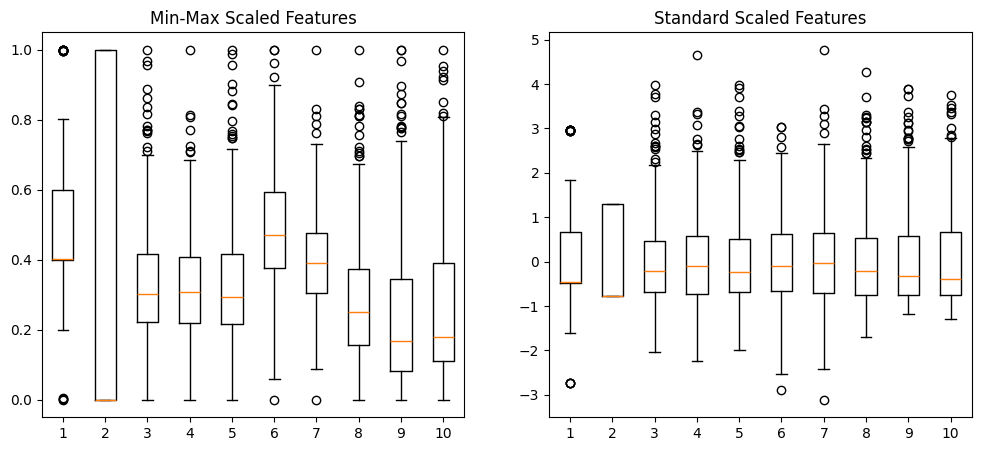

In [27]:
# Normalization using Min-Max Scaling
scaler_minmax = MinMaxScaler()
X_minmax_scaled = scaler_minmax.fit_transform(X)

print("\nMin-Max Scaled Features (first 5 rows):")
print(X_minmax_scaled[:5])

# Normalization using Standard Scaling (Z-Score)
scaler_standard = StandardScaler()
X_standard_scaled = scaler_standard.fit_transform(X)

print("\nStandard Scaled Features (first 5 rows):")
print(X_standard_scaled[:5])

# Visualizing the effects of normalization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.boxplot(X_minmax_scaled)
plt.title('Min-Max Scaled Features')

plt.subplot(1, 2, 2)
plt.boxplot(X_standard_scaled)
plt.title('Standard Scaled Features')

plt.show()

In [28]:
# Convert the 'radius_mean' column to numeric, coercing any non-convertible values to NaN
df["radius_mean"] = pd.to_numeric(df["radius_mean"], errors="coerce")

# Drop rows with missing values (NaN) in the 'radius_mean' column
df = df.dropna(subset=["radius_mean"])

# Define the target column for outlier detection
column = "radius_mean"

# Calculate the mean of the 'radius_mean' column
mean = df[column].mean()

# Calculate the standard deviation of the 'radius_mean' column
std_dev = df[column].std()

# Define the outlier threshold as 3 standard deviations from the mean
threshold = 3

# Identify rows where the absolute deviation from the mean exceeds the threshold
outliers = df[df[column].apply(lambda x: abs(x - mean) > threshold * std_dev)]

# Print the outliers in the specified column
print("Outliers in", column, "column:")
print(outliers)


Outliers in radius_mean column:
            id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
82   15.968616          1        25.22         24.91           171.5   
180  13.680370          1        27.22         21.87           182.1   
212  15.991478          1        28.11         18.47           188.5   
352  13.710137          1        25.73         17.46           174.2   
461  20.630379          1        27.42         26.27           186.9   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
82    7.538495           0.1063          0.236257        0.288107   
180   7.719130           0.1094          0.175129        0.252392   
212   7.824046           0.1142          0.141152        0.277707   
352   7.606387           0.1149          0.212123        0.290279   
461   7.824846           0.1084          0.181321        0.310055   

     concave points_mean area_mean_binned  
82              0.169321             High  
180             0.172103        